# PDPbox Boston Dataset Example

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Model-Interpretation/blob/master/PDPbox/PDPbox_Boston_Dataset_Example.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Model-Interpretation/blob/master/PDPbox/PDPbox_Boston_Dataset_Example.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

In [1]:
!pip install pdpbox

     |████████████████████████████████| 34.0MB 116kB/s 
     |████████████████████████████████| 13.1MB 347kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=0dcfe3c040eb2f19dd9f22936a11f7114729520a6a77840a1642b29fa94e0f7d
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from pdpbox import pdp, get_dataset, info_plots

In [2]:
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
X_train, X_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.2, random_state=42)

In [5]:
%%time
regressor = RandomForestRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)

CPU times: user 177 ms, sys: 2.45 ms, total: 179 ms
Wall time: 181 ms


In [6]:
regressor.score(X_test, y_test)

0.892250111740428

## Binary feature: CHAS 

Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).


### Target distribution

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


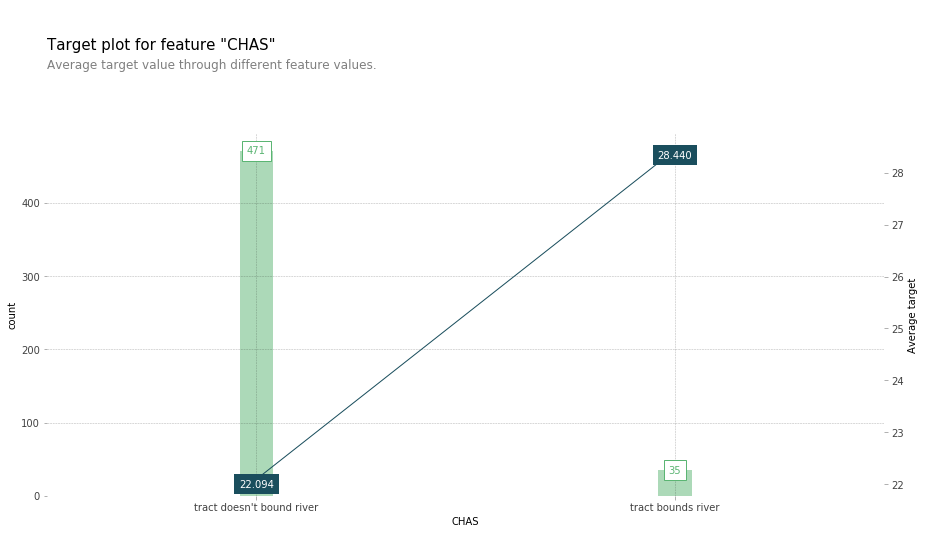

In [7]:
fig, axes, summary_df = info_plots.target_plot(
    df=df_boston, feature='CHAS', feature_name='CHAS', target='target'
)
_ = axes['bar_ax'].set_xticklabels(['tract doesn\'t bound river', 'tract bounds river'])

In [8]:
summary_df

,x,display_column,count,target
0,0,CHAS_0,471,22.093843
1,1,CHAS_1,35,28.440000


### Prediction distribution

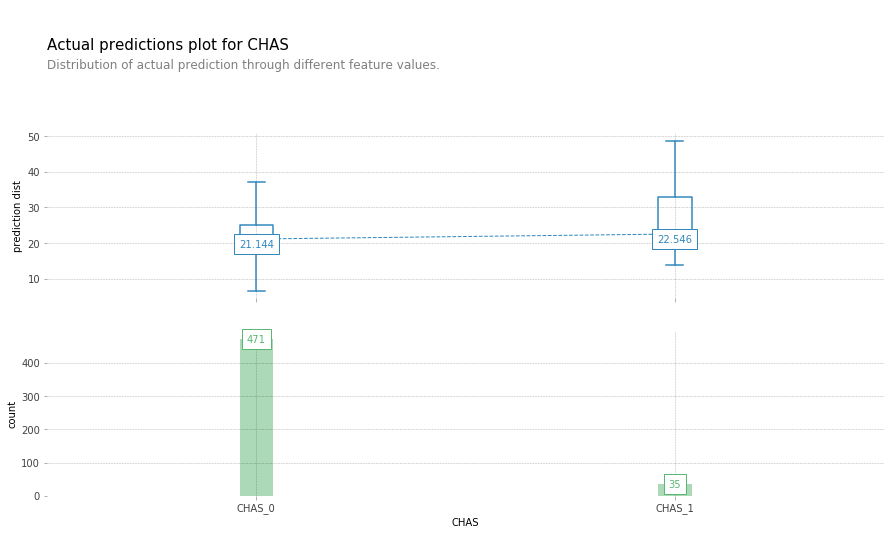

In [9]:
fig, axes, summary_df = info_plots.actual_plot(
    model=regressor, X=df_boston.drop('target', axis=1), feature='CHAS', feature_name='CHAS'
)

In [10]:
summary_df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,CHAS_0,471,16.956,21.144,24.993
1,1,CHAS_1,35,19.754,22.546,32.885


### Partial Dependence plot for CHAS column

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


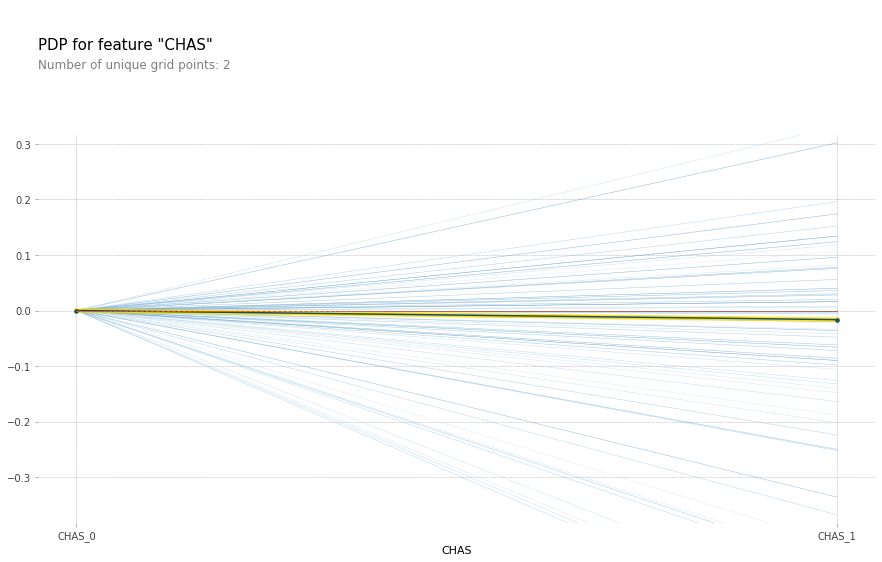

In [11]:
pdp_chas = pdp.pdp_isolate(
    model=regressor, dataset=df_boston, model_features=boston_data.feature_names, feature='CHAS'
)
fig, axes = pdp.pdp_plot(pdp_chas, 'CHAS', plot_lines=True, frac_to_plot=100)

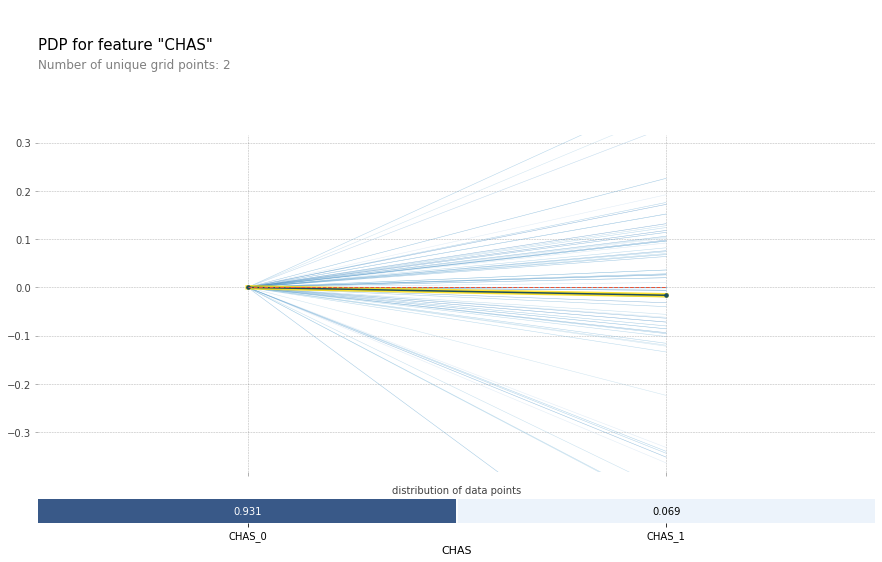

In [12]:
fig, axes = pdp.pdp_plot(pdp_chas, 'CHAS', plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

## Numerical feature: crim

per capita crime rate by town.

### Target distribution

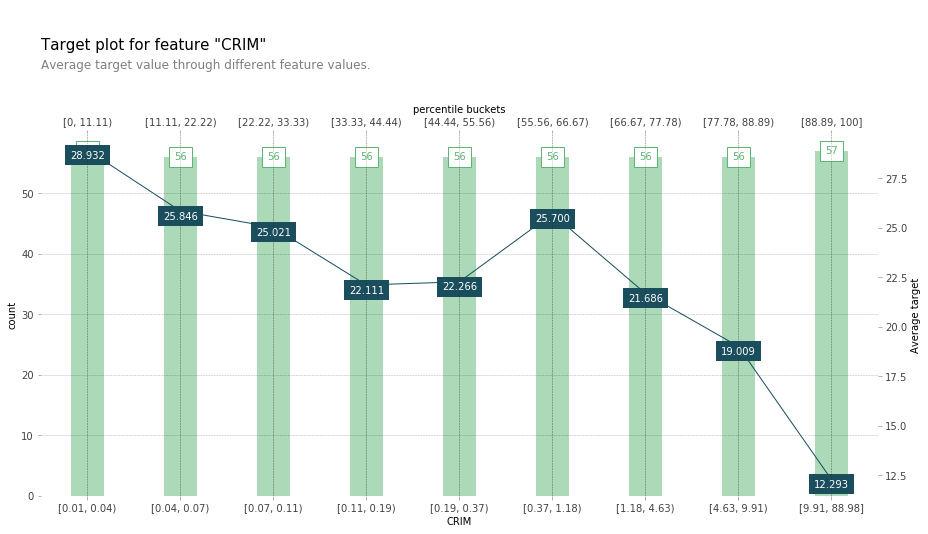

In [13]:
fig, axes, summary_df = info_plots.target_plot(
    df=df_boston, feature='CRIM', feature_name='CRIM', target='target', show_percentile=True
)

In [14]:
summary_df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,target
0,0,"[0.01, 0.04)",0.006320,0.042131,"[0, 11.11)",0.00,11.11,57,28.931579
1,1,"[0.04, 0.07)",0.042131,0.069337,"[11.11, 22.22)",11.11,22.22,56,25.846429
2,2,"[0.07, 0.11)",0.069337,0.114273,"[22.22, 33.33)",22.22,33.33,56,25.021429
3,3,"[0.11, 0.19)",0.114273,0.189413,"[33.33, 44.44)",33.33,44.44,56,22.110714
4,4,"[0.19, 0.37)",0.189413,0.369084,"[44.44, 55.56)",44.44,55.56,56,22.266071
5,5,"[0.37, 1.18)",0.369084,1.179200,"[55.56, 66.67)",55.56,66.67,56,25.700000
6,6,"[1.18, 4.63)",1.179200,4.626663,"[66.67, 77.78)",66.67,77.78,56,21.685714
7,7,"[4.63, 9.91)",4.626663,9.906210,"[77.78, 88.89)",77.78,88.89,56,19.008929
8,8,"[9.91, 88.98]",9.906210,88.976200,"[88.89, 100]",88.89,100.00,57,12.292982


### Prediction distribution

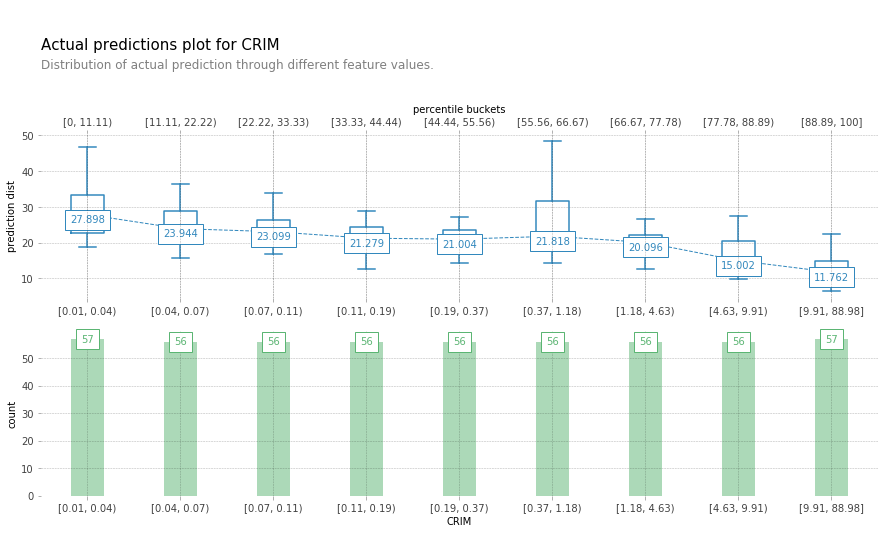

In [15]:
fig, axes, summary_df = info_plots.actual_plot(
    model=regressor, X=df_boston.drop('target', axis=1), feature='CRIM', feature_name='CRIM', show_percentile=True
)

In [16]:
summary_df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.01, 0.04)",0.006320,0.042131,"[0, 11.11)",0.00,11.11,57,22.8300,27.898,33.4260
1,1,"[0.04, 0.07)",0.042131,0.069337,"[11.11, 22.22)",11.11,22.22,56,21.2110,23.944,29.0155
2,2,"[0.07, 0.11)",0.069337,0.114273,"[22.22, 33.33)",22.22,33.33,56,21.1780,23.099,26.2750
3,3,"[0.11, 0.19)",0.114273,0.189413,"[33.33, 44.44)",33.33,44.44,56,19.6210,21.279,24.3965
4,4,"[0.19, 0.37)",0.189413,0.369084,"[44.44, 55.56)",44.44,55.56,56,18.3650,21.004,23.6090
5,5,"[0.37, 1.18)",0.369084,1.179200,"[55.56, 66.67)",55.56,66.67,56,17.7140,21.818,31.5865
6,6,"[1.18, 4.63)",1.179200,4.626663,"[66.67, 77.78)",66.67,77.78,56,15.9905,20.096,22.2910
7,7,"[4.63, 9.91)",4.626663,9.906210,"[77.78, 88.89)",77.78,88.89,56,13.5400,15.002,20.3720
8,8,"[9.91, 88.98]",9.906210,88.976200,"[88.89, 100]",88.89,100.00,57,8.7320,11.762,14.8280


### Partial Dependence plot for CRIM column

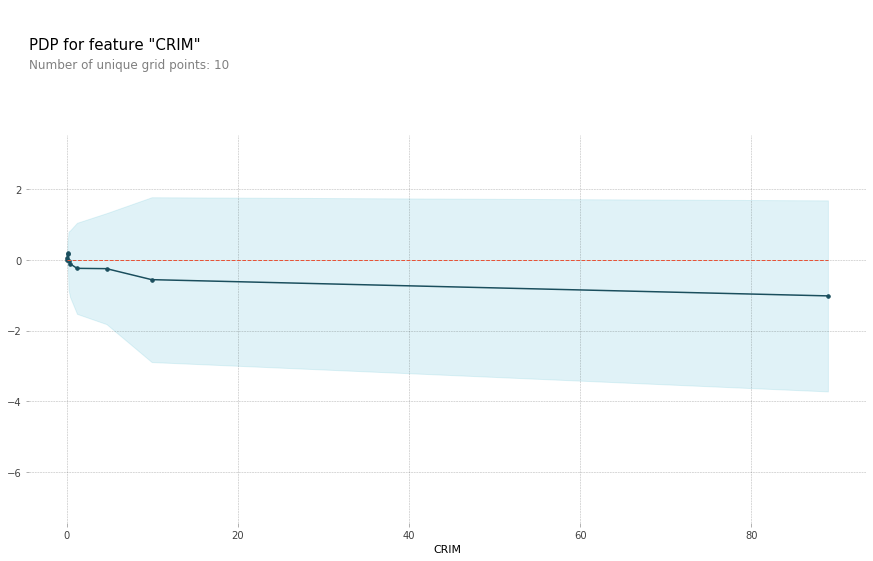

In [17]:
pdp_chas = pdp.pdp_isolate(
    model=regressor, dataset=df_boston, model_features=boston_data.feature_names, feature='CRIM'
)
fig, axes = pdp.pdp_plot(pdp_chas, 'CRIM')

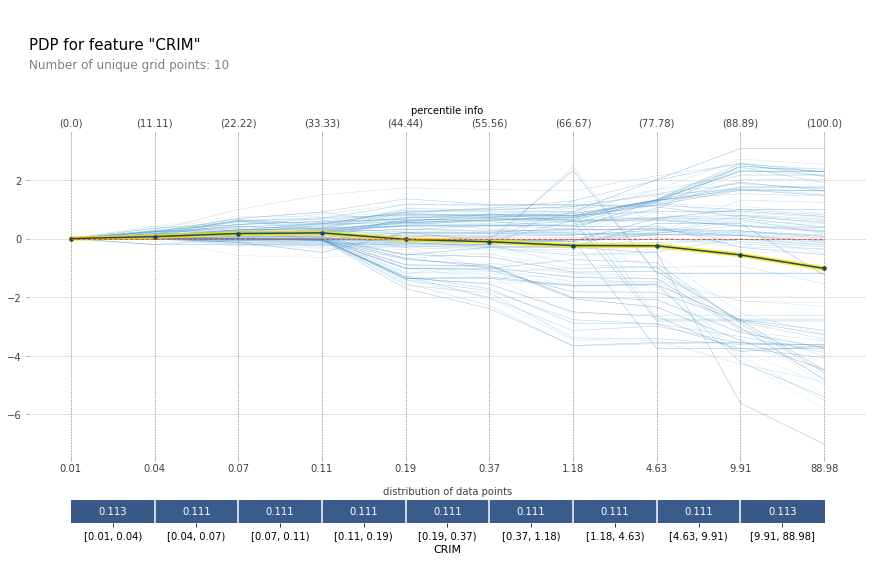

In [18]:
fig, axes = pdp.pdp_plot(
    pdp_chas, 'CRIM', plot_lines=True, frac_to_plot=100, x_quantile=True, 
    plot_pts_dist=True, show_percentile=True
)